In [1]:
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing import image
from PIL import Image
import cv2
import datetime


In [2]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    "D:\\Semester 8\\COMPUTER VISION AND PATTERN RECOGNITION [A]\\Assignment Final\\FaceMaskDetector-master\\Dataset\\Train_Data",
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')  # Use categorical mode

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    "D:\\Semester 8\\COMPUTER VISION AND PATTERN RECOGNITION [A]\\Assignment Final\\FaceMaskDetector-master\\Dataset\\Test_Data",
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')


Found 2666 images belonging to 3 classes.
Found 230 images belonging to 3 classes.


In [4]:
# Train the model
model.fit(
    train_set,
    epochs=10,
    validation_data=test_set,
    callbacks=[ModelCheckpoint('mymodel.h5', save_best_only=True)]
)

Epoch 1/10
167/167 [==============================] - 106s 623ms/step - loss: 0.5050 - accuracy: 0.7941 - val_loss: 9.4624 - val_accuracy: 0.0130
Epoch 2/10
167/167 [==============================] - 48s 285ms/step - loss: 0.1654 - accuracy: 0.9449 - val_loss: 5.3725 - val_accuracy: 0.0522
Epoch 3/10
167/167 [==============================] - 47s 278ms/step - loss: 0.1272 - accuracy: 0.9606 - val_loss: 7.1554 - val_accuracy: 0.0217
Epoch 4/10
167/167 [==============================] - 55s 328ms/step - loss: 0.0861 - accuracy: 0.9700 - val_loss: 10.3715 - val_accuracy: 0.0174
Epoch 5/10
167/167 [==============================] - 48s 289ms/step - loss: 0.0816 - accuracy: 0.9704 - val_loss: 11.9815 - val_accuracy: 0.0217
Epoch 6/10
167/167 [==============================] - 55s 329ms/step - loss: 0.0848 - accuracy: 0.9730 - val_loss: 12.4655 - val_accuracy: 0.0174
Epoch 7/10
167/167 [==============================] - 61s 362ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 11.0489 - v

In [6]:
# Load the trained model
from keras.models import load_model
mymodel = load_model('mymodel.h5')

1/1 [==============================] - 0s 457ms/step


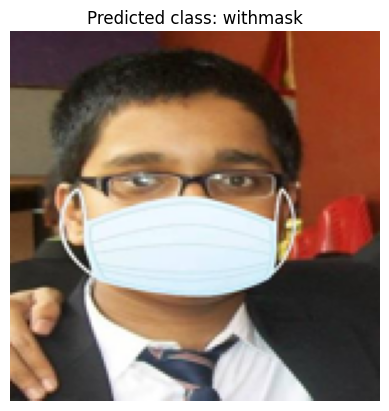

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

# Load the trained model
mymodel = load_model('mymodel.h5')

# Define the classes
classes = ['withmask', 'withoutmask', 'incorrect_wear_mask']

# Load and preprocess the image
image_path = r"D:\Semester 8\COMPUTER VISION AND PATTERN RECOGNITION [A]\Assignment Final\Assignment 2 (Face Mask Detection)\Dataset\Test_Data\with_mask\440-with-mask.jpg"  # Replace with the path to your test image
img = Image.open(image_path)
img = img.resize((150, 150))  # Resize the image to match the input size of the model
img_array = np.array(img) / 255.0  # Convert image to array and rescale
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = mymodel.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the image with annotation
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')  # Turn off axis labels
plt.show()

1/1 [==============================] - 0s 143ms/step


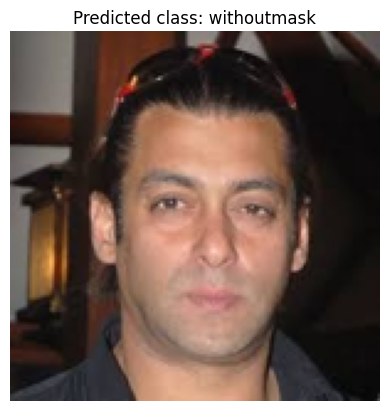

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

# Load the trained model
mymodel = load_model('mymodel.h5')

# Define the classes
classes = ['withmask', 'withoutmask', 'incorrect_wear_mask']

# Load and preprocess the image
image_path = r"D:\Semester 8\COMPUTER VISION AND PATTERN RECOGNITION [A]\Assignment Final\Assignment 2 (Face Mask Detection)\Dataset\Test_Data\without_mask\198.jpg"  # Replace with the path to your test image
img = Image.open(image_path)
img = img.resize((150, 150))  # Resize the image to match the input size of the model
img_array = np.array(img) / 255.0  # Convert image to array and rescale
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = mymodel.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the image with annotation
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')  # Turn off axis labels
plt.show()

1/1 [==============================] - 0s 106ms/step


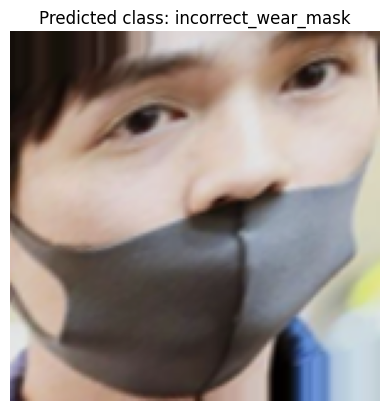

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

# Load the trained model
mymodel = load_model('mymodel.h5')

# Define the classes
classes = ['withmask', 'withoutmask', 'incorrect_wear_mask']

# Load and preprocess the image
image_path = r"D:\Semester 8\COMPUTER VISION AND PATTERN RECOGNITION [A]\Assignment Final\Assignment 2 (Face Mask Detection)\Dataset\Test_Data\mask_weared_incorrect\105.png"  # Replace with the path to your test image
img = Image.open(image_path)
img = img.resize((150, 150))  # Resize the image to match the input size of the model
img_array = np.array(img) / 255.0  # Convert image to array and rescale
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = mymodel.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the image with annotation
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
mymodel = load_model('mymodel.h5')

# Start capturing video from the laptop's camera
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame was captured successfully
    if not ret:
        print("Failed to capture frame from camera.")
        break
    
    # Resize the frame to match the input shape of the model
    resized_frame = cv2.resize(frame, (150, 150))
    
    # Preprocess the frame for prediction
    input_image = np.expand_dims(resized_frame, axis=0)
    input_image = input_image / 255.0  # Normalize pixel values
    
    # Predict using the model
    predictions = mymodel.predict(input_image)[0]
    
    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_prob = predictions[predicted_class_index]
    
    # Display the prediction result
    if predicted_class_index == 0:
        label = "With Mask"
        color = (0, 255, 0)
    elif predicted_class_index == 1:
        label = "Without Mask"
        color = (0, 0, 255)
    else:
        if predicted_class_prob >= 0.5:
            label = "without mask"
            color = (255, 0, 0)
        else:
            label = "With Mask"
            color = (0, 255, 0)
    
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    
    # Display the frame
    cv2.imshow('Face Mask Detection', frame)
    
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()